In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.read_csv(r'C:/Users/chant/Downloads/M890081new.csv')

In [117]:
df.head()

,Date,T_Means_Daily_MaximuM,T_Means_Daily_Minimum,T_Absolute_Maximum,T_Absolute_Minimum,Total_Rainfall,Highest_Daily_Rainfall_Total,Number_Of_Rainy_Days,Bright_Sunshine_Daily_Mean,Minimum Relative Humidity,24_Hours_Mean_Relative_Humidity
0,2023 Jul,31.7,26.5,33.6,22.8,158.0,51.4,14,5.8,42,75.1
1,2023 Jun,32.1,26.1,33.5,23.5,228.4,51.6,15,6.3,41,75.1
2,2023 May,32.9,26.7,35.0,23.4,112.8,34.6,11,6.6,43,73.7
3,2023 Apr,32.6,25.8,34.3,23.0,222.8,85.8,19,5.8,45,77.4
4,2023 Mar,30.9,24.6,33.6,21.8,243.4,90.2,12,6.0,52,79.2


In [4]:
df.columns=[x.lower() for x in df.columns]

In [5]:
df=df.set_index('date')

In [6]:
df

,t_means_daily_maximum,t_means_daily_minimum,t_absolute_maximum,t_absolute_minimum,total_rainfall,highest_daily_rainfall_total,number_of_rainy_days,bright_sunshine_daily_mean,minimum relative humidity,24_hours_mean_relative_humidity
date,,,,,,,,,,
2023 Jul,31.7,26.5,33.6,22.8,158.0,51.4,14,5.8,42,75.1
2023 Jun,32.1,26.1,33.5,23.5,228.4,51.6,15,6.3,41,75.1
2023 May,32.9,26.7,35.0,23.4,112.8,34.6,11,6.6,43,73.7
2023 Apr,32.6,25.8,34.3,23.0,222.8,85.8,19,5.8,45,77.4
2023 Mar,30.9,24.6,33.6,21.8,243.4,90.2,12,6.0,52,79.2
...,...,...,...,...,...,...,...,...,...,...
1975 May,31.4,24.0,33.1,22.2,104.6,49.0,13,5.6,na,86.1
1975 Apr,31.1,23.8,32.8,22.1,79.7,16.7,17,5.7,na,87.9
1975 Mar,31.1,23.1,32.5,21.8,197.9,40.0,18,5.8,na,87.8


In [7]:
df.index=pd.to_datetime(df.index)

In [8]:
df['minimum relative humidity'] = pd.to_numeric(df['minimum relative humidity'], errors='coerce')

In [9]:
df['minimum relative humidity']

date
2023-07-01    42.0
2023-06-01    41.0
2023-05-01    43.0
2023-04-01    45.0
2023-03-01    52.0
              ... 
1975-05-01     NaN
1975-04-01     NaN
1975-03-01     NaN
1975-02-01     NaN
1975-01-01     NaN
Name: minimum relative humidity, Length: 583, dtype: float64

In [10]:
df['minimum relative humidity'] = df['minimum relative humidity'].fillna(df['minimum relative humidity'].mean())

In [11]:
df['minimum relative humidity']

date
2023-07-01    42.000000
2023-06-01    41.000000
2023-05-01    43.000000
2023-04-01    45.000000
2023-03-01    52.000000
                ...    
1975-05-01    50.484211
1975-04-01    50.484211
1975-03-01    50.484211
1975-02-01    50.484211
1975-01-01    50.484211
Name: minimum relative humidity, Length: 583, dtype: float64

In [12]:
df['minimum relative humidity'] = df['minimum relative humidity'].astype(int)

In [13]:
df=df.sort_index()

In [14]:
df

,t_means_daily_maximum,t_means_daily_minimum,t_absolute_maximum,t_absolute_minimum,total_rainfall,highest_daily_rainfall_total,number_of_rainy_days,bright_sunshine_daily_mean,minimum relative humidity,24_hours_mean_relative_humidity
date,,,,,,,,,,
1975-01-01,30.5,22.8,31.8,20.0,121.0,41.0,13,6.2,50,85.8
1975-02-01,30.4,23.0,32.9,21.4,98.6,38.0,13,4.8,50,86.2
1975-03-01,31.1,23.1,32.5,21.8,197.9,40.0,18,5.8,50,87.8
1975-04-01,31.1,23.8,32.8,22.1,79.7,16.7,17,5.7,50,87.9
1975-05-01,31.4,24.0,33.1,22.2,104.6,49.0,13,5.6,50,86.1
...,...,...,...,...,...,...,...,...,...,...
2023-03-01,30.9,24.6,33.6,21.8,243.4,90.2,12,6.0,52,79.2
2023-04-01,32.6,25.8,34.3,23.0,222.8,85.8,19,5.8,45,77.4
2023-05-01,32.9,26.7,35.0,23.4,112.8,34.6,11,6.6,43,73.7


<Axes: >

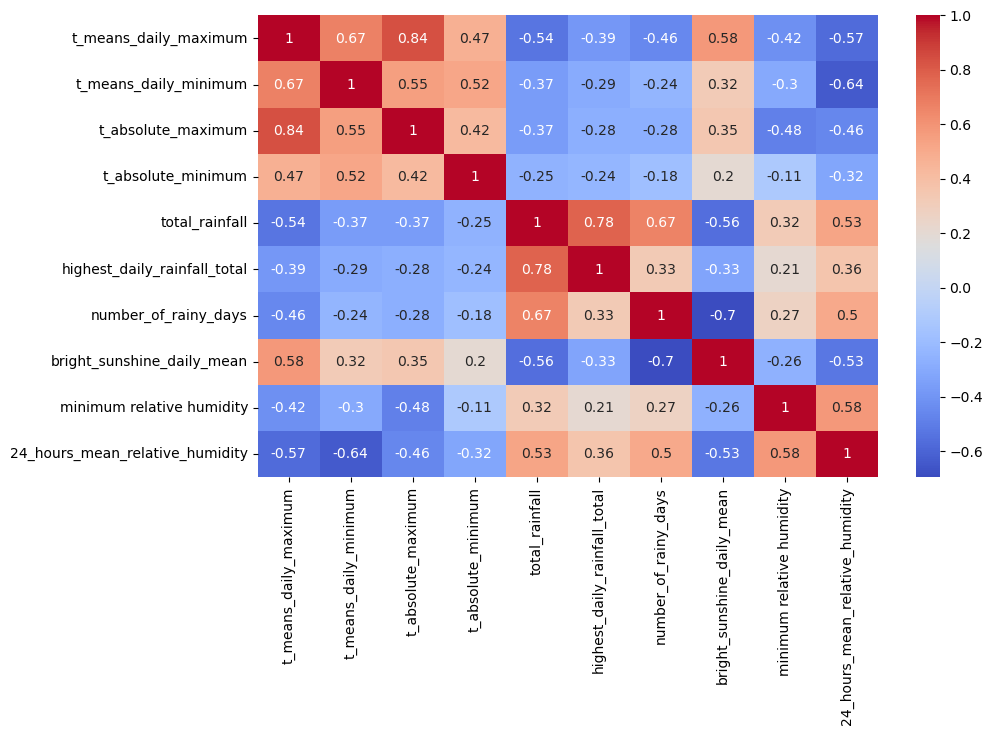

In [15]:
plt.figure(figsize=(10, 6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [16]:
df_drop=['t_means_daily_maximum','t_means_daily_minimum',
        'total_rainfall','highest_daily_rainfall_total','minimum relative humidity']

In [17]:
df=df.drop(df_drop,axis=1)

Text(0.5, 1.0, 'maximum and minimum temperature')

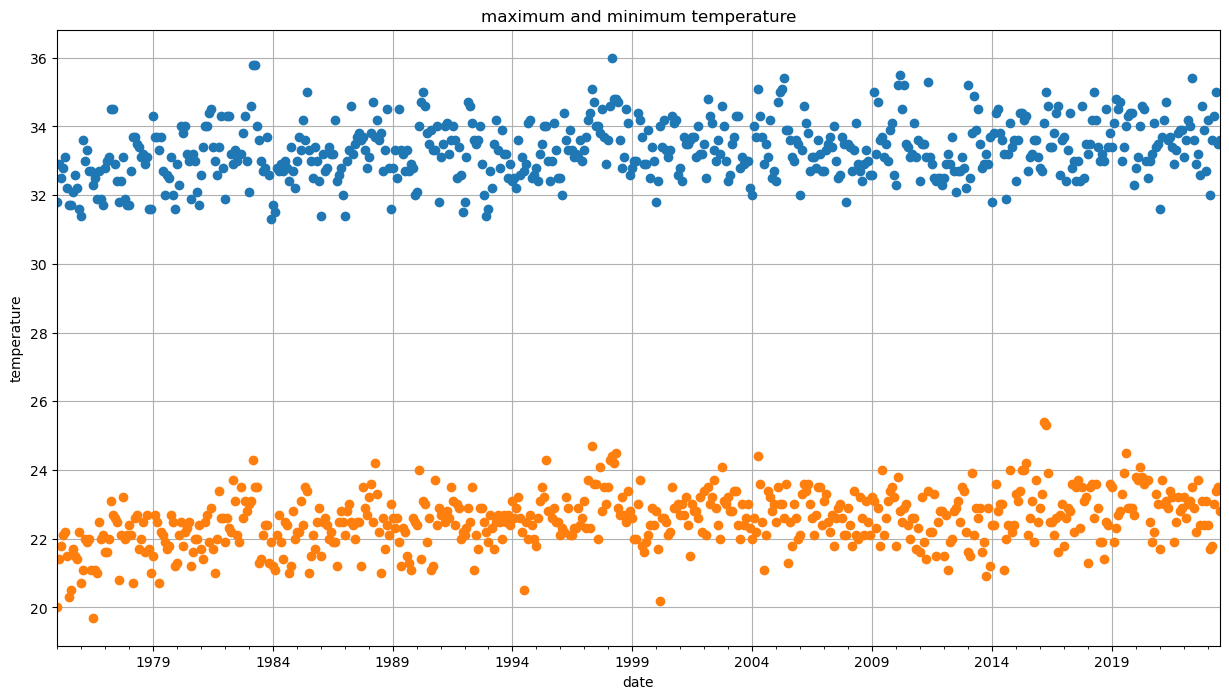

In [18]:
plt.figure(figsize=(15, 8))
df['t_absolute_maximum'].plot(marker='o',linestyle='')
df['t_absolute_minimum'].plot(marker='o',linestyle='')
plt.grid(True)
plt.ylabel('temperature')
plt.title('maximum and minimum temperature')

<Axes: title={'center': 'Relationship between number_of_rainy_days and bright_sunshine_daily_mean'}, xlabel='bright_sunshine_daily_mean', ylabel='number_of_rainy_days'>

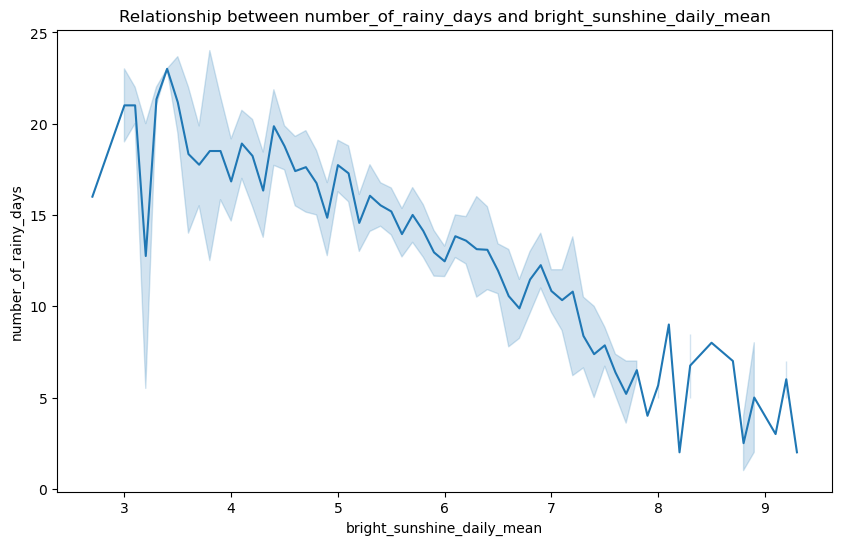

In [19]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between number_of_rainy_days and bright_sunshine_daily_mean')
sns.lineplot(df,y='number_of_rainy_days',x='bright_sunshine_daily_mean')

In [78]:
df['t_mean']=(df['t_absolute_maximum']+df['t_absolute_minimum'])/2

<Axes: xlabel='date'>

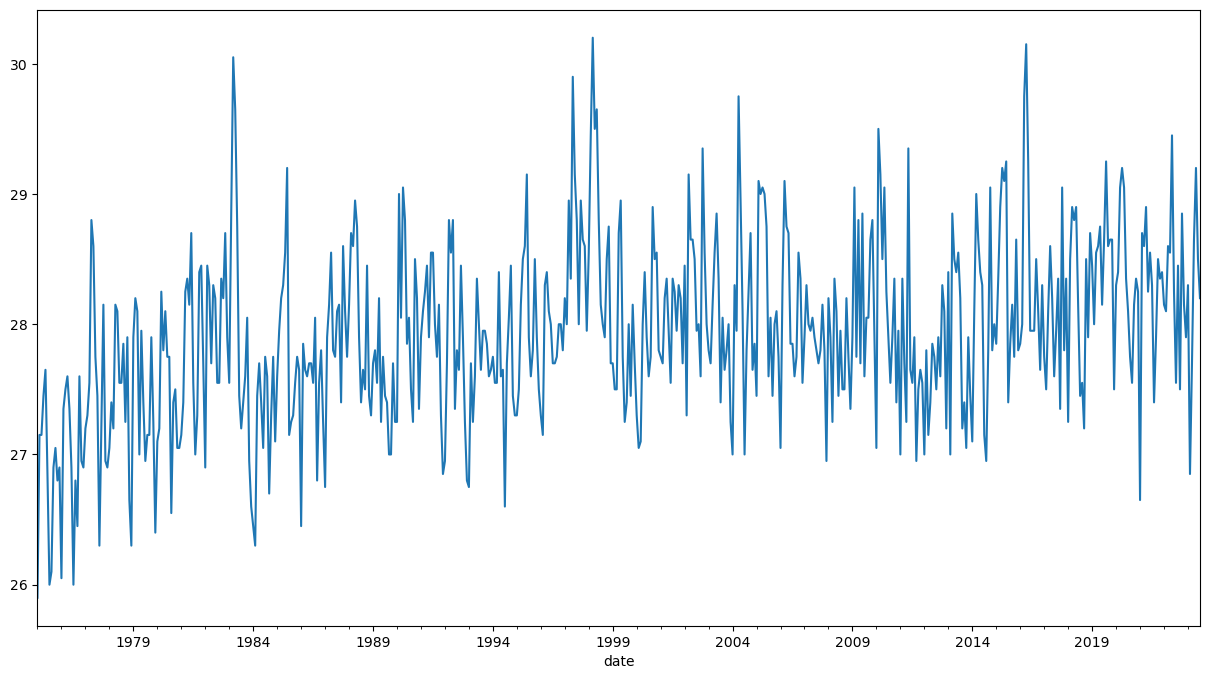

In [75]:
plt.figure(figsize=(15, 8))
df['t_mean'].plot()

In [21]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor

In [22]:
X=df.drop('t_absolute_maximum',axis=1)
y=df['t_absolute_maximum']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
model=XGBRegressor(n_estimators=200,early_stopping_rounds=50,eval_metric='mae')
model.fit(X_train, y_train, 
          eval_set=[(X_test, y_test)],  # Validation data
          verbose=True)  

[0]	validation_0-mae:22.95196
[1]	validation_0-mae:16.06712
[2]	validation_0-mae:11.24269
[3]	validation_0-mae:7.86614
[4]	validation_0-mae:5.50735
[5]	validation_0-mae:3.85734
[6]	validation_0-mae:2.71195
[7]	validation_0-mae:1.91081
[8]	validation_0-mae:1.34782
[9]	validation_0-mae:0.94040
[10]	validation_0-mae:0.66292
[11]	validation_0-mae:0.46617
[12]	validation_0-mae:0.33586
[13]	validation_0-mae:0.24896
[14]	validation_0-mae:0.19623
[15]	validation_0-mae:0.16297
[16]	validation_0-mae:0.14358
[17]	validation_0-mae:0.13165
[18]	validation_0-mae:0.12386
[19]	validation_0-mae:0.12030
[20]	validation_0-mae:0.11675
[21]	validation_0-mae:0.11378
[22]	validation_0-mae:0.11248
[23]	validation_0-mae:0.11128
[24]	validation_0-mae:0.10920
[25]	validation_0-mae:0.10766
[26]	validation_0-mae:0.10717
[27]	validation_0-mae:0.10619
[28]	validation_0-mae:0.10582
[29]	validation_0-mae:0.10552
[30]	validation_0-mae:0.10454
[31]	validation_0-mae:0.10396
[32]	validation_0-mae:0.10375
[33]	validation_0

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
features_data=pd.DataFrame(data=model.feature_importances_,
             index=model.feature_names_in_,
             columns=['importances'])

<Axes: title={'center': 'feature importance'}>

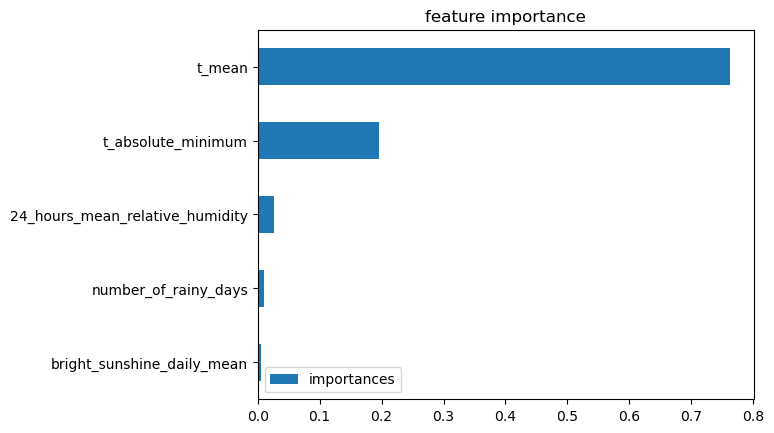

In [37]:
features_data.sort_values('importances').plot(kind='barh',title='feature importance')


In [62]:
predictions=model.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error


In [64]:
mean_absolute_error(y_test,predictions)

0.09737500653948096

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)

In [88]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [89]:
new_predictions=rf_model.predict(X_test)

In [90]:
mean_absolute_error(y_test,new_predictions)

0.10713714285714346

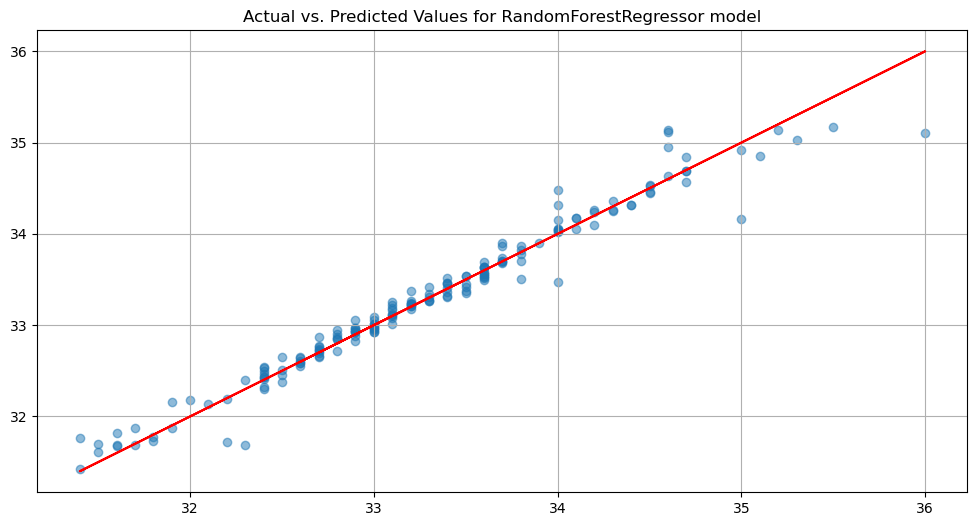

In [112]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions,alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('Actual vs. Predicted Values for RandomForestRegressor model')
plt.grid(True)

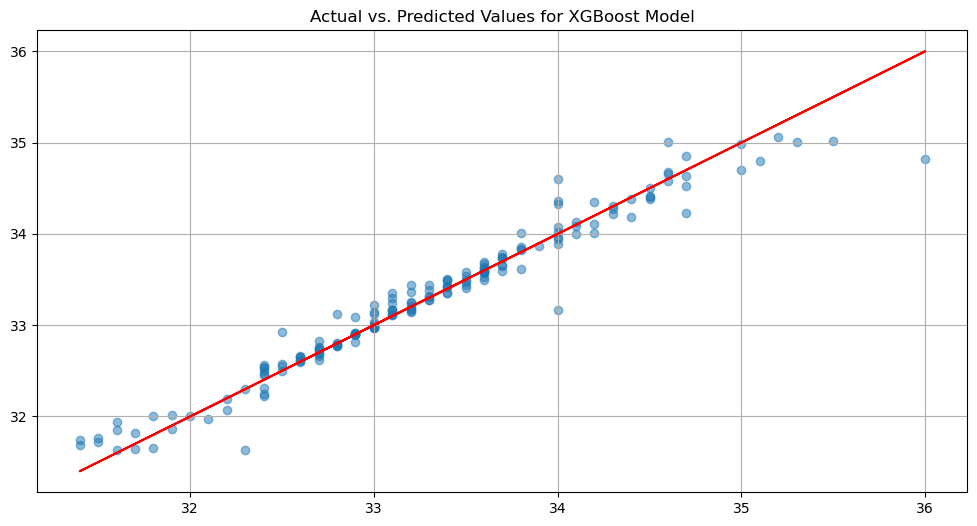

In [113]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,new_predictions,alpha=0.5)
plt.plot(y_test,y_test,'r')
plt.title('Actual vs. Predicted Values for XGBoost Model')
plt.grid(True)
